Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [187]:
%matplotlib inline

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

### Computing the linear least squares fit for log(weight) versus height

Assuming that the log(weight) mentioned in the prompt is the log base 10.

page 127 of ThinkStats2: "If there is a linear relationship between `xs` and `ys` with intercept `inter` and slope `slope`,     
we expect each `y[i]` to be `inter + slope * x[i]`"

So, according to the exercise prompt, we're looking at this relationship (using height and weight as pseudocode words):    
`log10(weight[i]) = inter + slope * height[i]`

In [188]:
import brfss as b
import numpy as np
import thinkstats2
import math
import seaborn as sns
sns.set(color_codes=True)

In [189]:
brfss_df = b.ReadBrfss()

[Found the descriptions in the 2009 codebook](http://www.cdc.gov/brfss/annual_data/2009/pdf/codebook_09.pdf)

Feature descriptions: 
* age = Reported Age in years
* sex = Respondent's Sex (1 for male, 2 for female)
* wtyrago = Reported Weight year ago in lbs
* finalwt = Final Weight
* wtkg2	= Computed Weight in kg
* htm3 = Computed Height in cm


In [190]:
brfss_df = brfss_df.dropna(subset=['htm3', 'wtkg2'])
heights = brfss_df['htm3']
weights = brfss_df['wtkg2']

In [191]:
log_weights = weights.copy()
log_weights = np.log10(log_weights)

In [192]:
print "Checking to make sure the log_weights seem reasonable \n"
print weights[0:10], "\n \n", log_weights[0:10] 

Checking to make sure the log_weights seem reasonable 

0      70.91
1      72.73
3      73.64
4      88.64
5     109.09
6      50.00
7     122.73
8      90.00
9      77.27
10     63.64
Name: wtkg2, dtype: float64 
 
0     1.850707
1     1.861714
3     1.867114
4     1.947630
5     2.037785
6     1.698970
7     2.088951
8     1.954243
9     1.888011
10    1.803730
Name: wtkg2, dtype: float64


In [193]:
inter, slope = thinkstats2.LeastSquares(heights, log_weights)
print "inter", inter
print "slope", slope

inter 0.993080416394
slope 0.00528145416942


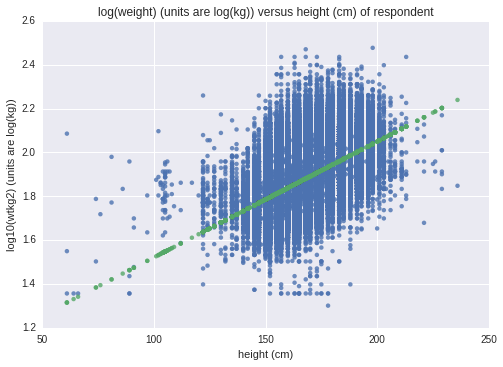

In [194]:
# scatter plot in blue
# setting fit_reg to False to instead use the inter and slope we just calculated
logweights_heights_plot = sns.regplot(x=heights, y=log_weights, fit_reg=False) 

# fit line in green
logweights_heights_fit_line_y = inter + slope * heights;
logweights_heights_plot = sns.regplot(x=heights, y=logweights_heights_fit_line_y, fit_reg=False) 

logweights_heights_plot.axes.set_title("log(weight) (units are log(kg)) versus height (cm) of respondent")
logweights_heights_plot.set_xlabel("height (cm)")
logweights_heights_plot.set_ylabel("log10(wtkg2) (units are log(kg))")

### Presenting the estimated parameters

The scatter plot above is a visualization of `log10(weight)` versus `height` of the respondent. However, this isn't intuitive for a general audience -- most people don't think of their weight and other personal numbers as a `log10` value.    

If you recall our pseudocode/expression for the plot: `log10(weight[i]) = inter + slope * height[i]`     
We can cancel out the log10 so the y axis will be in terms of weight instead of log10(weight).     
The revised pseudocode/expression will be: `weight[i] = 10**(inter + slope * height[i])`

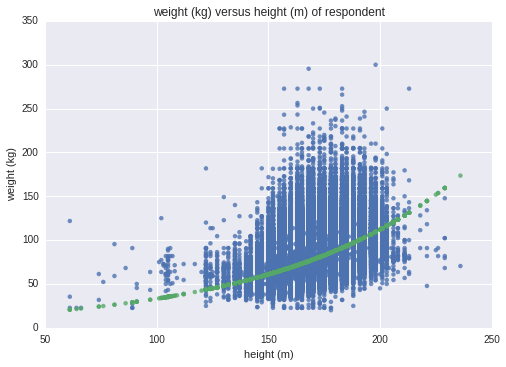

In [195]:
# scatter plot in blue
not_log_plot = sns.regplot(x=heights, y=10**log_weights, fit_reg=False)

# fit line in green
not_log_fit_line_y = 10**(inter + slope * heights)
not_log_plot = sns.regplot(x=heights, y=not_log_fit_line_y, fit_reg=False)

not_log_plot.axes.set_title("weight (kg) versus height (m) of respondent")
not_log_plot.axes.set_xlabel("height (m)")
not_log_plot.axes.set_ylabel("weight (kg)")

The visualization above is more compatible with how people usually talk about weight (kg) and height (cm). Overall, this confirms that as height increases, weight increases, and that the exact relationship between weight and height will vary. It seems that with larger height values, the rate of weight increase is higher compared to the smaller height values.

(Fumbling with the wording a bit here... wanting to not use a bunch of technical words because this paragraph in particular is meant to be towards a more general audience.)

### "If you were trying to guess someone’s weight, how much would it help to know their height?"

At surface level, this question can be interpreted as asking about the quality of the linear model. If the model between height and weight works well (i.e. the line is a good fit to the overall dataset), then it would be very helpful to know the height. We could additionally calculate more numbers to describe the goodness of fit, such as root mean squared error or the coefficient of determination. Although we were able to generate a fit line, it looks like there are many points that are not even close to the fit line (both above and under). This fit line may be good enough for some limited applications (and it is using only one independent variable: height), but future work should investigate different features and models for predicting weight. 

## Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

## Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

## Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.